<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


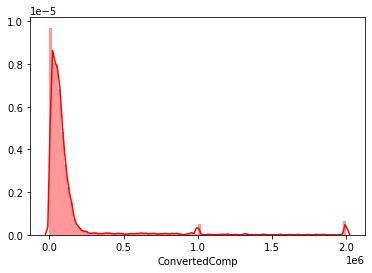

In [3]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

sns.distplot(df['ConvertedComp'], kde=True, color='red', bins=100)
plt.show()

Plot the histogram for the column `ConvertedComp`.


array([[<AxesSubplot:title={'center':'ConvertedComp'}>]], dtype=object)

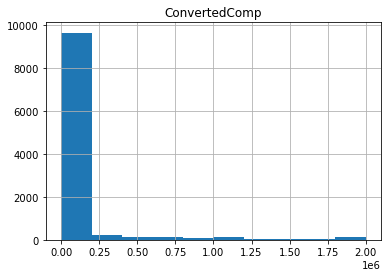

In [4]:
# your code goes here
df.hist(column='ConvertedComp')

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
medianConvComp= df['ConvertedComp'].median()
print("Median for ConvertedComp Column:", medianConvComp)

Median for ConvertedComp Column: 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
gender=['Man']
gender_man=df['Gender'].value_counts().reindex(gender)
print("Number of Respondents Identifying as Man :", gender_man)

Number of Respondents Identifying as Man : Man    10480
Name: Gender, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
CC_Woman=df.loc[df['Gender'] == 'Woman', ['ConvertedComp']].median()
print("Median ConvertedComp for  Women:", CC_Woman)

Median ConvertedComp for  Women: ConvertedComp    57708.0
dtype: float64


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
age=df['Age']
print('Min: %.3f' % age.min())
print('Q1: %.3f' % age.quantile(.25))
print('Median: %.3f' % age.quantile(.50))
print('Q3: %.3f' % age.quantile(.75))
print('Max: %.3f' % age.max())

Min: 16.000
Q1: 25.000
Median: 29.000
Q3: 35.000
Max: 99.000


Plot a histogram of the column `Age`.


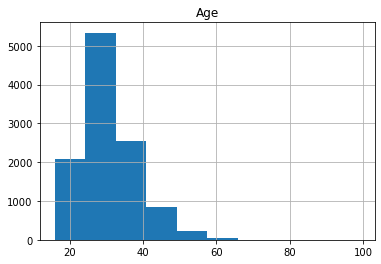

In [9]:
# your code goes here
df.hist(column=['Age'])
plt.show()

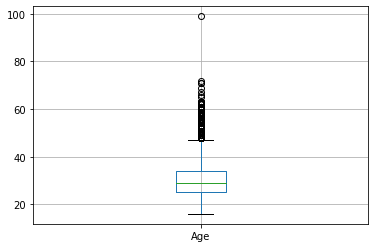

In [26]:
#additional code to answer question:outliers in boxplot age below Q1
df.boxplot(column=['Age'], return_type='axes')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


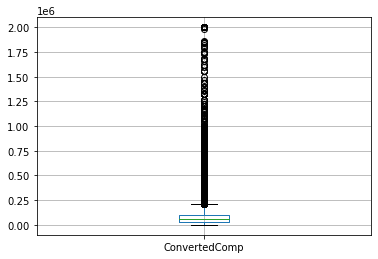

In [10]:
# your code goes here
df.boxplot(column=['ConvertedComp'], return_type='axes')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [11]:
# your code goes here
import numpy as np
df.drop_duplicates()
df['ConvertedComp'].dropna()
first_Quartile=df['ConvertedComp'].quantile(.25)
third_Quartile=df['ConvertedComp'].quantile(.75)
IQR=third_Quartile - first_Quartile
  
print(IQR)

73132.0


Find out the upper and lower bounds.


In [12]:
# your code goes here
lower_limit = first_Quartile - 1.5 * IQR
upper_limit = third_Quartile + 1.5 * IQR

print('lower bounds: ' + str(lower_limit))
print('upper bounds: ' + str(upper_limit))

lower bounds: -82830.0
upper bounds: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [13]:
# your code goes here
df[(df['ConvertedComp'] < lower_limit) | (df['ConvertedComp'] > upper_limit)].ConvertedComp.count()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [14]:
# your code goes here
df= df[~((df['ConvertedComp'] < (lower_limit)) | (df['ConvertedComp'] > (upper_limit)))]
df['ConvertedComp'].head()

0    61000.0
1    95179.0
2    90000.0
4    65277.0
5    31140.0
Name: ConvertedComp, dtype: float64

In [25]:
#additional code to answer question:median for ConvertedComp after removing outliers
medianConvComp_Out= df['ConvertedComp'].median()
print("Median for ConvertedComp Column:", medianConvComp_Out)

Median for ConvertedComp Column: 52704.0


In [27]:
#additional code to answer question:mean for ConvertedComp after removing outliers
meanConvComp_Out= df['ConvertedComp'].mean()
print("Mean for ConvertedComp Column:", meanConvComp_Out)

Mean for ConvertedComp Column: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [30]:
# your code goes here

#correlation between Age and numerical columns
df[['Age']].corr()

,Age
Age,1.0


In [29]:
#dataframe showing correlation between age and all other numerical columns
df[['Age','Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs','CodeRevHrs']].corr()

,Age,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs
Age,1.000000,0.003950,0.006371,0.401821,0.037452,-0.017961
Respondent,0.003950,1.000000,-0.019364,0.010878,-0.015275,0.002980
CompTotal,0.006371,-0.019364,1.000000,-0.063561,0.004975,0.017536
ConvertedComp,0.401821,0.010878,-0.063561,1.000000,0.034351,-0.088934
WorkWeekHrs,0.037452,-0.015275,0.004975,0.034351,1.000000,0.031963
CodeRevHrs,-0.017961,0.002980,0.017536,-0.088934,0.031963,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
